In [1]:
# path = '/content/drive/My Drive/capstone/'

In [1]:
# from sklearn.preprocessing import FunctionTransformer # ...
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shutil, os
from sklearn.model_selection import train_test_split
import dlib
from scipy.stats import percentileofscore
import itertools
from scipy.spatial import distance
# import stasm
from scipy.constants import golden
# from sklearn
import joblib
%matplotlib inline


In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
# from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint
import keras.backend as K


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Problem Statement

**Facial attractiveness  problem  has  found  its  way  to  the  deep learning community, and it can be built into various  useful applications,  such  as  a  recommendation  system,  content-based image  retrieval,  face  beautification and  face  editing.**

**One of the recruitment works includes photo grading, where the employee is  graded by  their photo. Facial attractiveness classification  can  also  help  the  work  of  photo  grading efficiently.**   

**The  other  use  of  facial  attractiveness classification is dataset labeling. The popularization of deep learning increases the demand  for  a  labeled dataset. While gathering  dataset  from  social  media  platform  is  not  a difficult task, however, labeling more than 10.000  datasets proved to be a problem, as labeling such dataset by hand is not  an  option anymore.  By  training  the  neural  network  to label datasets, we can gather a great amount of the datasets and label them without any difficulty (Anderson et. al, 2018)**

# Dataset was retrieved from SCUT-FBP5500-Database
Citation: @article{liang2017SCUT,\
  title     = {SCUT-FBP5500: A Diverse Benchmark Dataset for Multi-Paradigm Facial Beauty Prediction},\
  author    = {Liang, Lingyu and Lin, Luojun and Jin, Lianwen and Xie, Duorui and Li, Mengru},\
  journal    = {ICPR},\
  year      = {2018}\
}

# Import attractiveness score for all pictures

In [4]:
# get absolute path for jupyter notebook.
dir_path = os.path.dirname(os.path.realpath('Final_Capstone.ipynb'))
print(dir_path)

C:\Users\Daniel\Desktop\Facial-Attractiveness-Predictor


In [5]:
# get absolute path for csv file and create dataframe
all_ratings_path = os.path.join(dir_path,'All_Ratings.csv')
all_df = pd.read_csv(all_ratings_path)

FileNotFoundError: [Errno 2] File b'C:\\Users\\Daniel\\Desktop\\Facial-Attractiveness-Predictor\\All_Ratings.csv' does not exist: b'C:\\Users\\Daniel\\Desktop\\Facial-Attractiveness-Predictor\\All_Ratings.csv'

CSV file contains the scores of 60 individual raters for each picture. A groupby is used to get the average score of 60 raters for each picture

In [7]:
avg_all = all_df.groupby('Filename')['Rating'].mean().reset_index()

In [8]:
avg_all.head()

,Filename,Rating
0,AF1.jpg,2.333333
1,AF10.jpg,3.433333
2,AF100.jpg,2.900000
3,AF1000.jpg,3.966667
4,AF1001.jpg,3.733333


Each string in the column "Filename" represents a picture. The first two letters represent the Race and Gender of the person in the picture.

In [9]:
# Filter for asian Females
avg_af = avg_all[avg_all.Filename.str.contains("AF")]

In [10]:
# Filter for asian Males
avg_am = avg_all[avg_all.Filename.str.contains("AM")]

# EDA

## histogram of attractiveness for Asian Females

Text(0.5, 1.0, 'Asian Females Histogram')

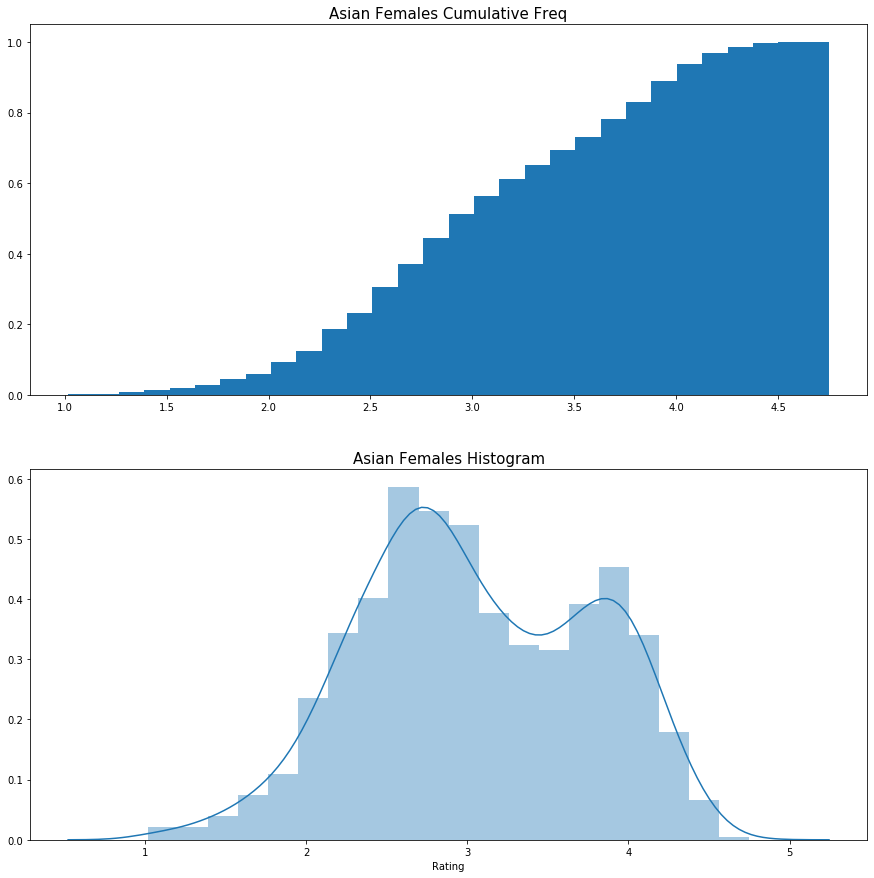

In [11]:
fig = plt.figure(figsize=(15,15))
ax1 = ax1 = plt.subplot(211)
plt.hist(avg_af['Rating'],bins = 30, cumulative=True, density = True);
ax1.set_title('Asian Females Cumulative Freq', fontsize=15)

ax2 = plt.subplot(212)
sns.distplot(avg_af['Rating'],bins=20);
ax2.set_title('Asian Females Histogram', fontsize=15)

#### highest rating for asian female


In [12]:
np.percentile(avg_af['Rating'],100)

4.75

#### lowest rating for asian female

In [13]:
np.percentile(avg_af['Rating'],0)

1.0166666666666666

#### mean rating for asian female

In [14]:
np.mean(avg_af['Rating'])

3.0546500000000174

In [15]:
np.std(avg_af['Rating'])

0.7128834560743039

#### median rating for asian female

In [16]:
np.percentile(avg_af['Rating'],50)

2.966666666666667

#### 75th percentile for asian female

In [17]:
np.percentile(avg_af['Rating'],75)

3.683333333333333

#### Asian Female score comparison

In [18]:
score = 3.5
mt = percentileofscore(avg_all['Rating'],score,kind='strict')
e = sum(avg_all['Rating']==score)/len(avg_all['Rating'])*100 #add True booleans
mte = percentileofscore(avg_all['Rating'],score,kind='weak')

print(f'''

If you score {score}, 
you are more attractive than {mt} of the dataset
you are as attractive as {e} of the dataset
you are at least as attractive as {mte} of the dataset
''')



If you score 3.5, 
you are more attractive than 73.94545454545455 of the dataset
you are as attractive as 0.5272727272727272 of the dataset
you are at least as attractive as 74.47272727272727 of the dataset



## histogram of attractiveness for Asian Males

Text(0.5, 1.0, 'Asian Males Histogram')

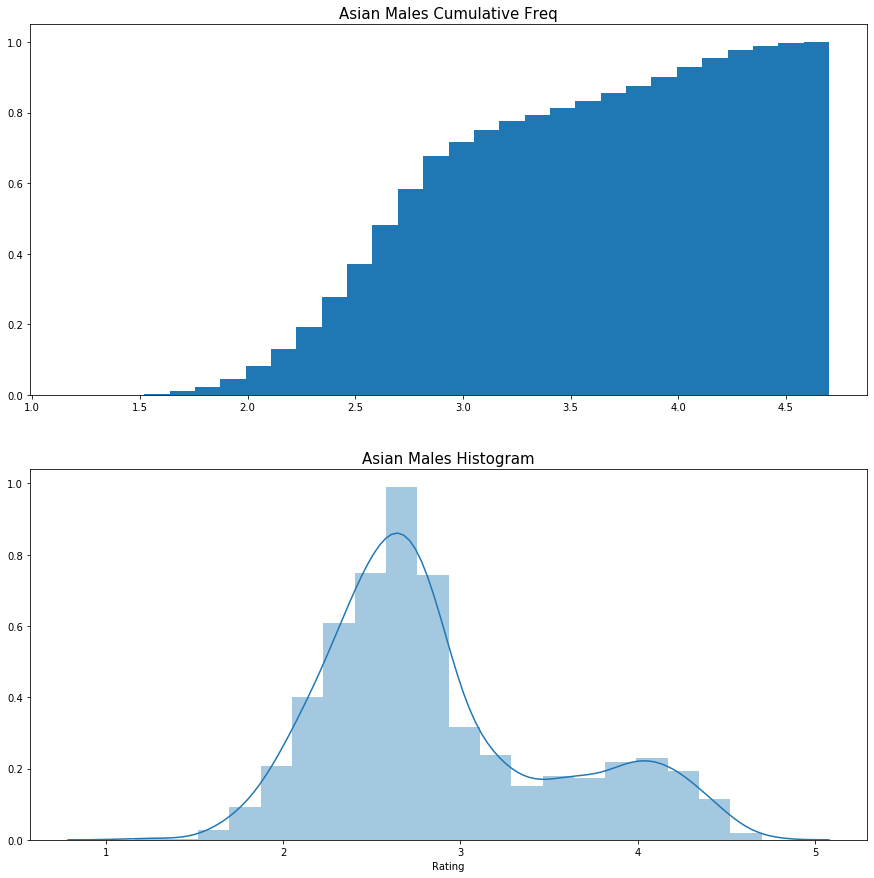

In [19]:
fig = plt.figure(figsize=(15,15))
ax1 = ax1 = plt.subplot(211)
plt.hist(avg_am['Rating'],bins = 30, cumulative=True, density = True);
ax1.set_title('Asian Males Cumulative Freq', fontsize=15)

ax2 = plt.subplot(212)
sns.distplot(avg_am['Rating'],bins=20);
ax2.set_title('Asian Males Histogram', fontsize=15)

#### highest rating for asian male

In [20]:
np.percentile(avg_am['Rating'],100)

4.7

#### lowest rating for asian male

In [21]:
np.percentile(avg_am['Rating'],0)

1.1666666666666667

#### mean rating for asian male

In [22]:
np.mean(avg_am['Rating'])

2.866783333333335

In [23]:
np.std(avg_am['Rating'])

0.6578854913449744

#### median rating for asian male

In [24]:
np.percentile(avg_am['Rating'],50)

2.716666666666667

#### 75th percentile for asian male

In [25]:
np.percentile(avg_am['Rating'],75)

3.1666666666666665

#### Asian Female score comparison

In [26]:
am_score = 3.2
am_mt = percentileofscore(avg_am['Rating'],am_score,kind='strict')
am_e = sum(avg_am['Rating']==am_score)/len(avg_am['Rating'])*100 #add True booleans
am_mte = percentileofscore(avg_am['Rating'],am_score,kind='weak')

print(f'''
For Asian Males:
If you score {am_score}, 
you are more attractive than {am_mt} of the dataset
you are as attractive as {am_e} of the dataset
you are at least as attractive as {am_mte} of the dataset
''')


For Asian Males:
If you score 3.2, 
you are more attractive than 75.4 of the dataset
you are as attractive as 0.35000000000000003 of the dataset
you are at least as attractive as 75.75 of the dataset



## Asian Male vs Female

Text(0.5, 1.0, 'Asian Males')

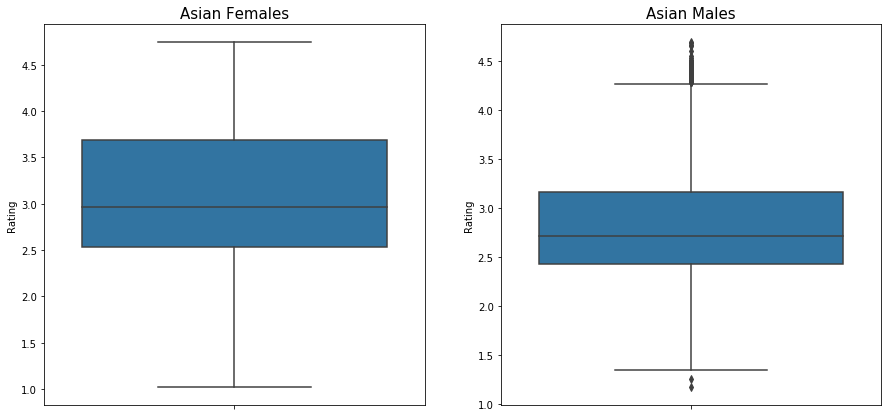

In [27]:
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
sns.boxplot(avg_af['Rating'],orient = 'v')
ax1.set_title('Asian Females',fontsize=15)

ax2 = plt.subplot(122)
sns.boxplot(avg_am['Rating'],orient = 'v')
ax2.set_title('Asian Males',fontsize=15)

# Split images

## Create column to stratify

In [28]:
avg_all['rounded_rating'] = avg_all['Rating'].apply(lambda x: np.floor(x))
avg_all.head()

,Filename,Rating,rounded_rating
0,AF1.jpg,2.333333,2.0
1,AF10.jpg,3.433333,3.0
2,AF100.jpg,2.900000,2.0
3,AF1000.jpg,3.966667,3.0
4,AF1001.jpg,3.733333,3.0


This column will not be used for modelling. However it is created in order to stratify the dataset evenly.

### Crop faces from pictures

The dataset provided has 5500 pictures in a 350 x 350 format. However, each picture has different backgrounds which may affect the scoring. Hence, Dlib will be used to crop the faces out of the existing pictures.

In [29]:
detector = dlib.get_frontal_face_detector()
image_path = os.path.join(dir_path,'Images')
end_path = os.path.join(dir_path,'cropped_faces')
# img = cv2.imread(image_path+'AF1.jpg',cv2.IMREAD_COLOR)
# faces_detected = detector(img, 0)
# # try:
# #    crop_1st_face = img[faces_detected[0].top():faces_detected[0].bottom(),faces_detected[0].left():faces_detected[0].right()]               
# #    cv2.imwrite(f"{end_path}/{'test.jpg'}", crop_1st_face)
# # except:
# #   pass

### create absolute path column for All pictures for keras

In [30]:
avg_all['Path'] = avg_all['Filename'].apply(lambda x: os.path.join(end_path,x))
avg_all = avg_all.sort_values('Filename')

As dlib may not be able to detect faces in all of the cropped pictures. An additional column will be created to show which pictures have been successfully cropped

In [31]:
# Create list of all pictures that have been successfully cropped
# If the picture has been successfully cropped, the picture should appear in the 'cropped_faces' folder.
cropped_face = [pic.name for pic in os.scandir(end_path)]

# For each picture, label 1 if it is in the list, else label 0
avg_all['crop'] = avg_all['Filename'].apply(lambda x: 1 if x in cropped_face else 0)


In [32]:
# Total number of labelled pictures
avg_all['crop'].sum()

5480

In [33]:
# def crop_face(df):
#   detector = dlib.get_frontal_face_detector()
#   image_path = '/content/drive/My Drive/capstone/Images/'
#   end_path = '/content/drive/My Drive/capstone/Cropped_faces/'
#   img = cv2.imread(f'{image_path}{df.Filename}',cv2.IMREAD_COLOR)
#   faces_detected = detector(img, 0)
#   try:
#     crop_1st_face = img[faces_detected[0].top():faces_detected[0].bottom(),faces_detected[0].left():faces_detected[0].right()]               
#     cv2.imwrite(f'{end_path}{df.Filename}', crop_1st_face)
#     return 1
#   except:
#     return 0



In [34]:
# avg_all['crop'] = avg_all.apply(crop_face,axis=1)

In [35]:
# joblib.dump(avg_all,'/content/drive/My Drive/capstone/avg_all.pkl')

In [36]:
# avg_all = joblib.load('/content/drive/My Drive/capstone/avg_all.pkl')

### Filter dataframe to only those that have cropped faces

In [37]:
avg_all_crop = avg_all.copy()[avg_all['crop']==1]

### Filter dataframe to only asian female faces

In [38]:
avg_all_crop_asian_female = avg_all_crop[avg_all_crop.Filename.str.contains("AF")]

In [39]:
train_af,temp_af = train_test_split(avg_all_crop_asian_female, train_size =0.8, random_state=42, stratify = avg_all_crop_asian_female['rounded_rating'])

In [40]:
test_af,val_af = train_test_split(temp_af, train_size =0.5, random_state=42, stratify = temp_af['rounded_rating'])

### Filter dataframe to only asian male faces

In [41]:
avg_all_crop_asian_male = avg_all_crop[avg_all_crop.Filename.str.contains("AM")]

In [42]:
train_am,temp_am = train_test_split(avg_all_crop_asian_male, train_size =0.8, random_state=42, stratify = avg_all_crop_asian_male['rounded_rating'])

In [43]:
test_am,val_am = train_test_split(temp_am, train_size =0.5, random_state=42, stratify = temp_am['rounded_rating'])

# Generate data from images

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Asian Female Data Generator

In [45]:
af_train_generator = train_datagen.flow_from_dataframe(    
    dataframe = train_af,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=16,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)

af_val_generator = val_datagen.flow_from_dataframe(    
    dataframe = val_af,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=16,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)

af_test_generator = test_datagen.flow_from_dataframe(    
    dataframe = test_af,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=1,
    shuffle=False, # Shuffle False for test 
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)
    


Found 1594 validated image filenames.
Found 200 validated image filenames.
Found 199 validated image filenames.


## Asian Male Data Generator

In [46]:
am_train_generator = train_datagen.flow_from_dataframe(    
    dataframe = train_am,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=16,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)

am_val_generator = val_datagen.flow_from_dataframe(    
    dataframe = val_am,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=16,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)

am_test_generator = test_datagen.flow_from_dataframe(    
    dataframe = test_am,
    directory=None,
    x_col='Path',
    y_col='Rating',
    weight_col=None, #column in `dataframe` that contains the sample weights.
    target_size=(224, 224), #img resize
    color_mode='rgb',
    classes=None,
    class_mode='raw',
    batch_size=1,
    shuffle=False, # Shuffle False for test 
    seed=42,
    save_to_dir=None,
    save_prefix='',
    save_format='jpeg',
    subset=None,
    interpolation='bicubic',
    validate_filenames=True)
    


Found 1597 validated image filenames.
Found 200 validated image filenames.
Found 200 validated image filenames.


# Transfer learning Asian Female

In [4]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [5]:
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(1, activation="linear")(x)
af_model = Model(base_model.input, x)

# for layer in base_model.layers:
#     layer.trainable = False
# model.save_weights("all_nontrainable.h5")

# base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# x = Flatten()(base_model.output)
# x = Dense(1, activation="linear")(x)
# model = Model(base_model.input, x)

# for layer in base_model.layers[:-26]:
#     layer.trainable = False
af_model.load_weights("all_weights_resnet_dlib_crop_mse_af_only.best.hdf5")

af_model.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [49]:
af_model.compile(loss= 'mse', optimizer='adam', metrics=['mae','mse'])

# checkpoint
checkpoint = ModelCheckpoint("all_weights_resnet_dlib_crop_mse_2.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

AF_STEP_SIZE_TRAIN = (af_train_generator.n) // (af_train_generator.batch_size)
AF_STEP_SIZE_VALID = (af_val_generator.n) // (af_val_generator.batch_size)
AF_STEP_SIZE_TEST = (af_test_generator.n) // (af_test_generator.batch_size)

# steps_per_epoch: Integer.
#         Total number of steps (batches of samples)
#         to yield from `generator` before declaring one epoch
#         finished and starting the next epoch. It should typically
#         be equal to `ceil(num_samples / batch_size)`


In [50]:
# af_history = af_model.fit_generator(generator=af_train_generator,
#                     steps_per_epoch=AF_STEP_SIZE_TRAIN,
#                     validation_data=af_val_generator,
#                     validation_steps=AF_STEP_SIZE_VALID,
#                     epochs=75,
#                     callbacks=callbacks_list             
# )

## Visualise AF model

In [51]:
layer_dict = dict([(layer.name, layer) for layer in af_model.layers])

layer_name = 'activation_700'

model = Model(inputs=af_model.inputs, outputs=layer_dict[layer_name].output)

# Perpare the image
image = load_img('C:/Users/Daniel/Desktop/attract_cap/Predict_attractiveness/cropped_faces/AF5.jpg', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Apply the model to the image
feature_maps = model.predict(image)

square = 6
index = 1
fig = plt.figure(figsize = (20,20))
for _ in range(square):
	for _ in range(square):
        
		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
		index += 1
        

plt.show()

KeyError: 'activation_700'

In [ ]:
af_model.evaluate_generator(af_test_generator,AF_STEP_SIZE_TEST, verbose=0)

In [ ]:
af_comp = test_af.copy()

In [ ]:
af_pred = af_model.predict_generator(af_test_generator,AF_STEP_SIZE_TEST, verbose=0)
af_comp['Pred'] = af_pred
af_comp['diff'] = af_comp['Rating'] - af_comp['Pred']

In [ ]:
def Y_test_vs_Y_predict(Ytest,Ypredict,title=None):
    fig = plt.figure(figsize=(15,15))
    plt.scatter(Ytest, Ypredict)
    plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()])
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(title,fontsize=15)

## Asian Female comparison

In [ ]:
Y_test_vs_Y_predict(af_comp['Rating'],af_comp['Pred'],'Actual vs Pred')

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = ax1 = plt.subplot(211)
plt.hist(af_comp['Pred'],bins = 30, cumulative=True, density = True);
ax1.set_title('Asian Females Cumulative Freq', fontsize=15)

ax2 = plt.subplot(212)
sns.distplot(af_comp['Pred'],bins=20);
ax2.set_title('Asian Females Histogram', fontsize=15)

In [ ]:
# train_loss = history.history['loss']
# test_loss = history.history['val_loss']
# plt.figure(figsize=(12, 8))
# plt.plot(train_loss, label='Training loss', color='red')
# plt.plot(test_loss, label='Testing loss', color='blue')
# plt.legend();

In [ ]:
# train_loss = history.history['mean_squared_error']
# test_loss = history.history['val_mean_squared_error']
# plt.figure(figsize=(12, 8))
# plt.plot(train_loss, label='Training loss', color='red')
# plt.plot(test_loss, label='Testing loss', color='blue')
# plt.legend();

In [ ]:
af_pics = list(af_comp['Filename'])
af_pics_underpred = list(af_comp[af_comp['diff']>0.7]['Filename'])
af_pics_overpred = list(af_comp[af_comp['diff']<-0.7]['Filename'])
af_pics_exactpred = list(af_comp[abs(af_comp['diff'])<0.3]['Filename'])
af_pics_mt3 = list(af_comp[abs(af_comp['Rating'])>3]['Filename'])

In [ ]:
picture = np.random.choice(af_pics,1)[0]
img = plt.imread(f'{end_path}/{picture}')
plt.imshow(img)
af_comp[af_comp['Filename']==picture]

In [ ]:
def score_to_label_af(df):
    if df < np.percentile(avg_af['Rating'],75):
        return 0
    else:
        return 1

In [ ]:
af_comp['actual_label'] = af_comp['Rating'].apply(score_to_label_af)
af_comp['pred_label'] = af_comp['Pred'].apply(score_to_label_af)

In [ ]:
af_comp.head()

In [ ]:
y_true = af_comp['actual_label']
y_pred = af_comp['pred_label']
cm = confusion_matrix(y_true, y_pred)

fig = plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='.0f',annot_kws={'size':25})
plt.title('Asian Female Above 75% attractiveness')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

# Transfer Learning Asian Male

In [6]:
# from keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(1, activation="linear")(x)
am_model = Model(base_model.input, x)

# for layer in base_model.layers:
#     layer.trainable = False
# model.save_weights("all_nontrainable.h5")

# base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# x = Flatten()(base_model.output)
# x = Dense(1, activation="linear")(x)
# model = Model(base_model.input, x)

# for layer in base_model.layers[:-26]:
#     layer.trainable = False
am_model.load_weights("all_weights_resnet_dlib_crop_mse_am_only.best.hdf5")

am_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
am_model.compile(loss= 'mse', optimizer='adam', metrics=['mae','mse'])

# checkpoint
checkpoint = ModelCheckpoint("all_weights_resnet_dlib_crop_mse_2.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

AM_STEP_SIZE_TRAIN = (am_train_generator.n) // (am_train_generator.batch_size)
AM_STEP_SIZE_VALID = (am_val_generator.n) // (am_val_generator.batch_size)
AM_STEP_SIZE_TEST = (am_test_generator.n) // (am_test_generator.batch_size)

# steps_per_epoch: Integer.
#         Total number of steps (batches of samples)
#         to yield from `generator` before declaring one epoch
#         finished and starting the next epoch. It should typically
#         be equal to `ceil(num_samples / batch_size)`


In [ ]:
# am_history = am_model.fit_generator(generator=am_train_generator,
#                     steps_per_epoch=AM_STEP_SIZE_TRAIN,
#                     validation_data=am_val_generator,
#                     validation_steps=AM_STEP_SIZE_VALID,
#                     epochs=75,
#                     callbacks=callbacks_list             
# )

## Visualizing Asian Males

In [12]:
layer_dict = dict([(layer.name, layer) for layer in am_model.layers])

layer_name = 'activation_750'

model = Model(inputs=am_model.inputs, outputs=layer_dict[layer_name].output)

# Perpare the image
image = load_img('C:/Users/Daniel/Desktop/attract_cap/Predict_attractiveness/cropped_faces/AM1.jpg', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)


# Apply the model to the image
feature_maps = model.predict(image)

square = 6
index = 1
fig = plt.figure(figsize = (20,20))
for _ in range(square):
	for _ in range(square):
        
		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
		index += 1
        

plt.show()

NameError: name 'am_model' is not defined

In [ ]:
am_model.evaluate_generator(am_test_generator,AM_STEP_SIZE_TEST, verbose=0)

In [ ]:
am_comp = test_am.copy()

In [ ]:
am_pred = am_model.predict_generator(am_test_generator,AM_STEP_SIZE_TEST, verbose=0)
am_comp['Pred'] = am_pred
am_comp['diff'] = am_comp['Rating'] - am_comp['Pred']

## Asian Male comparison

In [ ]:
Y_test_vs_Y_predict(am_comp['Rating'],am_comp['Pred'],'Actual vs Pred')

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = ax1 = plt.subplot(211)
plt.hist(am_comp['Pred'],bins = 30, cumulative=True, density = True);
ax1.set_title('Asian Males Cumulative Freq', fontsize=15)

ax2 = plt.subplot(212)
sns.distplot(am_comp['Pred'],bins=20);
ax2.set_title('Asian Males Histogram', fontsize=15)

In [ ]:
# train_loss = history.history['loss']
# test_loss = history.history['val_loss']
# plt.figure(figsize=(12, 8))
# plt.plot(train_loss, label='Training loss', color='red')
# plt.plot(test_loss, label='Testing loss', color='blue')
# plt.legend();

In [ ]:
# train_loss = history.history['mean_squared_error']
# test_loss = history.history['val_mean_squared_error']
# plt.figure(figsize=(12, 8))
# plt.plot(train_loss, label='Training loss', color='red')
# plt.plot(test_loss, label='Testing loss', color='blue')
# plt.legend();

In [ ]:
am_pics = list(am_comp['Filename'])
am_pics_underpred = list(am_comp[am_comp['diff']>0.5]['Filename'])
am_pics_overpred = list(am_comp[am_comp['diff']<-0.5]['Filename'])
am_pics_exactpred = list(am_comp[abs(am_comp['diff'])<0.3]['Filename'])
am_pics_mt3 = list(am_comp[abs(am_comp['Rating'])>3.2]['Filename'])

In [ ]:
picture = np.random.choice(am_pics,1)[0]
img = plt.imread(f'{end_path}/{picture}')
plt.imshow(img)
am_comp[am_comp['Filename']==picture]

In [ ]:
def score_to_label_am(df):
    if df < np.percentile(avg_am['Rating'],75):
        return 0
    else:
        return 1

In [ ]:
am_comp['actual_label'] = am_comp['Rating'].apply(score_to_label_am)
am_comp['pred_label'] = am_comp['Pred'].apply(score_to_label_am)

In [ ]:
y_true = am_comp['actual_label']
y_pred = am_comp['pred_label']
cm = confusion_matrix(y_true, y_pred)

fig = plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='.0f',annot_kws={'size':25})
plt.title('Asian Male Above 75% attractiveness')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [1380]:
target_names = ['class 0', 'class 1',]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.95       148
     class 1       0.91      0.81      0.86        52

    accuracy                           0.93       200
   macro avg       0.92      0.89      0.91       200
weighted avg       0.93      0.93      0.93       200



# All pictures

In [8]:
# from keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(1, activation="linear")(x)
model = Model(base_model.input, x)

# for layer in base_model.layers:
#     layer.trainable = False
# model.save_weights("all_nontrainable.h5")

# base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# x = Flatten()(base_model.output)
# x = Dense(1, activation="linear")(x)
# model = Model(base_model.input, x)

# for layer in base_model.layers[:-26]:
#     layer.trainable = False
model.load_weights("all_weights_resnet_dlib_crop_mse_af_only.best.hdf5")

model.summary()

NameError: name 'ResNet50' is not defined

# Rotate img function

In [17]:
def rotate_pic(img,rotation_angle,scale = 1):
    # convert to RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # get image height, width
    (h, w) = img.shape[:2
                        ]
    # calculate the center of the image
    center = (w / 2, h / 2)


    # Perform the counter clockwise rotation holding at the center
    M = cv2.getRotationMatrix2D(center, rotation_angle, scale)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

# Asian female Predictor

[[3.48478]]


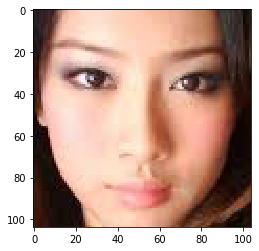

In [14]:

feed = cv2.imread('C:/Users/Daniel/Desktop/attract_cap/Predict_attractiveness/attractive_girl3.jpg')
detector = dlib.get_frontal_face_detector()

faces_detected = detector(feed, 0)
try:
    crop_1st_face = feed[faces_detected[0].top():faces_detected[0].bottom(), 
                    faces_detected[0].left():faces_detected[0].right()]
    img = cv2.cvtColor(crop_1st_face, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img,(224,224))
    img_std = img/255
    img_feed = np.reshape(img_std,[1,224,224,3])

    score = af_model.predict(img_feed)

    print(score)
except:
    print("No face detected")


# Asian male Predictor

[[3.21241]]


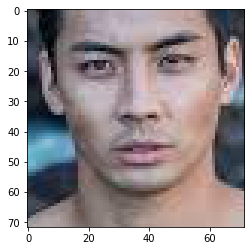

In [15]:

feed = cv2.imread('C:/Users/Daniel/Desktop/attract_cap/Predict_attractiveness/attractive_guy3.jpg')
detector = dlib.get_frontal_face_detector()

faces_detected = detector(feed, 0)
try:
    crop_1st_face = feed[faces_detected[0].top():faces_detected[0].bottom(), 
                    faces_detected[0].left():faces_detected[0].right()]
    img = cv2.cvtColor(crop_1st_face, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img,(224,224))
    img_std = img/255
    img_feed = np.reshape(img_std,[1,224,224,3])

    score = am_model.predict(img_feed)

    print(score)
except:
    print("No face detected")


[[2.6649427]]


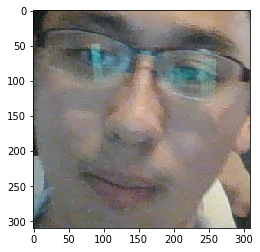

In [26]:
path = 'C:/Users/Daniel/Pictures/Camera Roll/WIN_20200228_21_38_49_Pro.jpg'
feed = cv2.imread(path)
feed = rotate_pic(feed,0)
detector = dlib.get_frontal_face_detector()

faces_detected = detector(feed, 0)
try:
    crop_1st_face = feed[faces_detected[0].top():faces_detected[0].bottom(), 
                    faces_detected[0].left():faces_detected[0].right()]
    img = cv2.cvtColor(crop_1st_face, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img,(224,224))
    img_std = img/255
    img_feed = np.reshape(img_std,[1,224,224,3])

    score = am_model.predict(img_feed)

    print(score)
      
except:
    print("No face detected")


# Future work

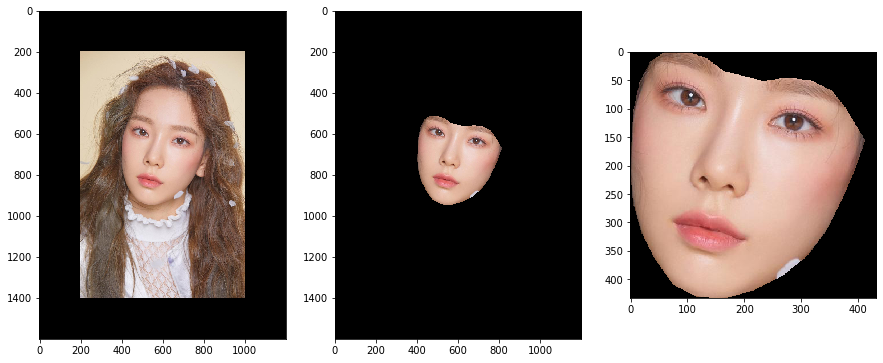

In [1423]:
import skimage
from PIL import Image

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

img = dlib.load_rgb_image('Taeyeon2.jpg')

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    
img = np.pad(img, ((200,200), (200,200), (0, 0)), 'constant')

rect = detector(img)[0]
sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])
outline = landmarks[[*range(17), *range(26,16,-1)]]
Y, X = skimage.draw.polygon(outline[:,1], outline[:,0])
landmark_crop = np.zeros(img.shape, dtype=np.uint8)
landmark_crop[Y, X] = img[Y, X]


y_min = min(Y)
x_min = min(X)
y_max = max(Y)
x_max = max(X)
y_diff = y_max - y_min
x_diff = x_max - x_min 

if y_diff > x_diff:
    both_diff = y_diff
else:
    both_diff = x_diff


cropped_face = landmark_crop[y_min:(y_min+both_diff), 
                    #"top:bottom"
                    x_min:(x_min+both_diff)
                   #"left:right"
                          ]

fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(img)
ax2.imshow(landmark_crop)
ax3.imshow(cropped_face)


# Conclusion

- Some possible reasons that the model was not as accurate as It should be was because of the imbalanced spread of scores in the dataset.
- The model also has certain biases which causes it to over pred less attractive people with these features and under predict more attractive people without them
- By providing more data on attractive and less attractive picutres, it would be able to generalise better.